## Part 1

### Dataset Information

The data is about the variability of consumer engagement analysed through a Principal Component Analysis, highlighting the changes induced by the use of Facebook Live. I am analyzing whether Thai users' engagement on sellers' facebook Live streams has more positive reactions or more negative reactions.


Reference: https://archive.ics.uci.edu/ml/datasets/Facebook+Live+Sellers+in+Thailand

### Import functions

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

### Load data

In [3]:
#url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00488/Live_20210128.csv'

data = pd.read_csv('Live_20210128.csv')
data.head(10)

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
5,6,photo,4/18/2018 2:14,217,6,0,211,5,1,0,0,0,NaN,NaN,NaN,NaN
6,7,video,4/18/2018 0:24,503,614,72,418,70,10,2,0,3,NaN,NaN,NaN,NaN
7,8,video,4/17/2018 7:42,295,453,53,260,32,1,1,0,1,NaN,NaN,NaN,NaN
8,9,photo,4/17/2018 3:33,203,1,0,198,5,0,0,0,0,NaN,NaN,NaN,NaN
9,10,photo,4/11/2018 4:53,170,9,1,167,3,0,0,0,0,NaN,NaN,NaN,NaN


### Summary of the data

In [4]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
data.describe()

,status_id,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
count,7050.00,7050.00,7050.00,7050.00,7050.00,7050.00,7050.00,7050.00,7050.00,7050.00,0.00,0.00,0.00,0.00
mean,3525.50,230.12,224.36,40.02,215.04,12.73,1.29,0.70,0.24,0.11,nan,nan,nan,nan
std,2035.30,462.63,889.64,131.60,449.47,39.97,8.72,3.96,1.60,0.73,nan,nan,nan,nan
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,nan,nan,nan,nan
25%,1763.25,17.00,0.00,0.00,17.00,0.00,0.00,0.00,0.00,0.00,nan,nan,nan,nan
50%,3525.50,59.50,4.00,0.00,58.00,0.00,0.00,0.00,0.00,0.00,nan,nan,nan,nan
75%,5287.75,219.00,23.00,4.00,184.75,3.00,0.00,0.00,0.00,0.00,nan,nan,nan,nan
max,7050.00,4710.00,20990.00,3424.00,4710.00,657.00,278.00,157.00,51.00,31.00,nan,nan,nan,nan


### List of attributes and data types

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   int64  
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(10), object(2)
memory

* There are the total of 7050 instances and 16 attributes in this data set. All except status_type and status_published columns are numeric.
* There are 4 columns of float data type, 10 columns of integer type, and 2 columns of object type.
* There are 4 columns containing 7050 NaN values which are Column1, Colomn2, Column3, and Column4.

In [35]:
#data.drop(columns=['Column1', 'Column2', 'Column3', 'Column4'])
data.drop(['Column1', 'Column2', 'Column3', 'Column4'], axis=1)



,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7045,7046,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0
7046,7047,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0
7047,7048,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0
7048,7049,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0


In [7]:
# confirm that Columns1 has missing values
column1_missing = data['Column1'].isna()
data.loc[column1_missing,:]
column1_missing.value_counts()

True    7050
Name: Column1, dtype: int64

In [8]:
# confirm that Columns2 has missing values
column2_missing = data['Column2'].isna()
data.loc[column2_missing,:]
column2_missing.value_counts()

True    7050
Name: Column2, dtype: int64

In [9]:
# confirm that Columns3 has missing values
column3_missing = data['Column3'].isna()
data.loc[column3_missing,:]
column3_missing.value_counts()

True    7050
Name: Column3, dtype: int64

In [10]:
# confirm that Columns4 has missing values
column4_missing = data['Column4'].isna()
data.loc[column4_missing,:]
column4_missing.value_counts()

True    7050
Name: Column4, dtype: int64

In [11]:
# Calculate mean reactions comments, likes, shares, loves, wows, hahas, sads, and angrys for each media type
mean_values = data[['status_type', 'num_reactions','num_comments', 'num_shares', 'num_likes', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']].groupby('status_type').mean()
mean_values

,num_reactions,num_comments,num_shares,num_likes,num_wows,num_hahas,num_sads,num_angrys
status_type,,,,,,,,
link,370.14,5.70,4.40,369.62,0.19,0.03,0.00,0.00
photo,181.29,15.99,2.55,178.78,0.68,0.19,0.14,0.05
status,438.78,36.24,2.56,435.53,1.17,0.11,0.39,0.02
video,283.41,642.48,115.68,243.02,2.45,1.74,0.41,0.25


In [12]:
# Display maximum reactions comments, likes, shares, loves, wows, hahas, sads, and angrys for each media type
max_values = data[['status_type', 'num_reactions','num_comments', 'num_shares', 'num_likes', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']].groupby('status_type').max()
max_values

,num_reactions,num_comments,num_shares,num_likes,num_wows,num_hahas,num_sads,num_angrys
status_type,,,,,,,,
link,2214,70,57,2214,6,1,0,0
photo,4710,10194,1260,4710,38,97,51,31
status,2799,1186,78,2799,65,5,12,4
video,4094,20990,3424,4094,278,157,37,8


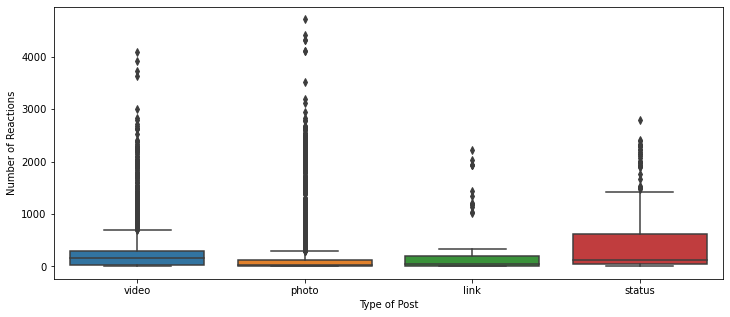

In [13]:
plt.figure(figsize=(12, 5))
sns.boxplot(x ='status_type', y='num_reactions', data=data)
plt.xlabel('Type of Post')
plt.ylabel('Number of Reactions')

plt.show()

There are outliers in all media types.

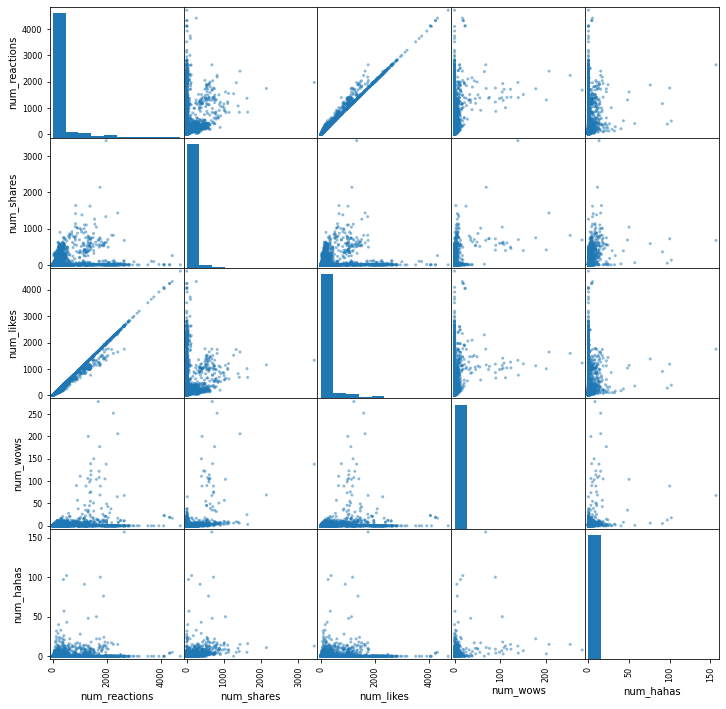

In [14]:
scatterData = ['num_reactions', 'num_shares', 'num_likes', 'num_wows', 'num_hahas']
scatter_matrix(data[scatterData],figsize=(12, 12))

plt.show()

There is corelation between number of likes and number of reactions, this can be predicted as the number of reactions increases, the number of likes also increases.

### Modify data

In [15]:
# Columns used for this exploration include 'num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows','num_hahas', 'num_sads', 'num_angrys'.

reactions = data.loc[:,'num_reactions': 'num_angrys']
reactions

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,529,512,262,432,92,3,1,1,0
1,150,0,0,150,0,0,0,0,0
2,227,236,57,204,21,1,1,0,0
3,111,0,0,111,0,0,0,0,0
4,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...
7045,89,0,0,89,0,0,0,0,0
7046,16,0,0,14,1,0,1,0,0
7047,2,0,0,1,1,0,0,0,0
7048,351,12,22,349,2,0,0,0,0


In [16]:
# get minimum value of each column
reactions.min()

num_reactions    0
num_comments     0
num_shares       0
num_likes        0
num_loves        0
num_wows         0
num_hahas        0
num_sads         0
num_angrys       0
dtype: int64

In [17]:
# get maximum value of each column
reactions.max()

num_reactions     4710
num_comments     20990
num_shares        3424
num_likes         4710
num_loves          657
num_wows           278
num_hahas          157
num_sads            51
num_angrys          31
dtype: int64

In [18]:
# get mean value of each column
reactions.mean()

num_reactions   230.12
num_comments    224.36
num_shares       40.02
num_likes       215.04
num_loves        12.73
num_wows          1.29
num_hahas         0.70
num_sads          0.24
num_angrys        0.11
dtype: float64

In [19]:
# get total value of each column
reactions.sum()

num_reactions    1622326
num_comments     1581710
num_shares        282159
num_likes        1516054
num_loves          89737
num_wows            9090
num_hahas           4910
num_sads            1718
num_angrys           798
dtype: int64

### Calculate positive reactions and display in bar chart

In [20]:
# get number of positive reactions, data used are from 'num_shares', 'num_likes', 'num_loves', 'num_wows', and 'num_hahas'
positiveReactions = data.loc[:,'num_shares':'num_hahas'].sum()
# add total
positiveReactions['Total'] = positiveReactions['num_shares']+positiveReactions['num_likes']+positiveReactions['num_loves']+positiveReactions['num_wows']+positiveReactions['num_hahas']
print('Below is the total number of positivetive reactions')
positiveReactions

Below is the total number of positivetive reactions


num_shares     282159
num_likes     1516054
num_loves       89737
num_wows         9090
num_hahas        4910
Total         1901950
dtype: int64

Text(0.5, 1.0, 'Positive Reactions')

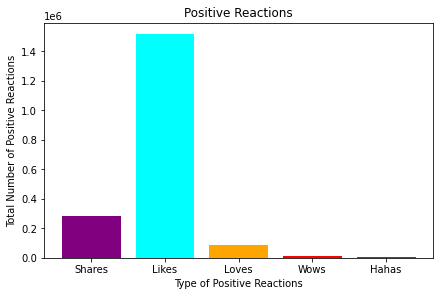

In [21]:
fig = plt.figure(constrained_layout=True)
ax_array = fig.subplots(1, 1, squeeze=False)

ax_array[0, 0].bar(['Shares', 'Likes', 'Loves', 'Wows', 'Hahas'], [282159, 1516054, 89737, 9090, 4910], color=['purple', 'cyan', 'orange', 'red', 'green'])
plt.xlabel("Type of Positive Reactions")
plt.ylabel("Total Number of Positive Reactions")
plt.title("Positive Reactions")

### Calculate negative reactions and display in bar chart

In [22]:
# get number of negative reactions, data used are from 'num_sads' and 'num_angrys'
negativeReactions = data.loc[:,'num_sads':'num_angrys'].sum()
# add total
negativeReactions['Total'] = negativeReactions['num_sads']+negativeReactions['num_angrys']
print('Below is the total number of negative reactions')
negativeReactions


Below is the total number of negative reactions


num_sads      1718
num_angrys     798
Total         2516
dtype: int64

Text(0.5, 1.0, 'Negative Reactions')

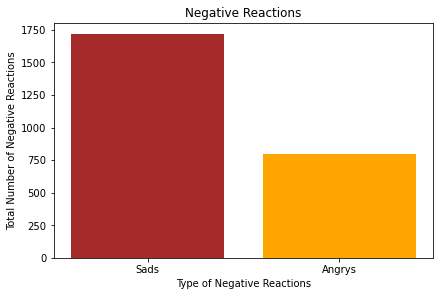

In [23]:
fig = plt.figure(constrained_layout=True)
ax_array = fig.subplots(1, 1, squeeze=False)

ax_array[0, 0].bar(['Sads', 'Angrys'], [1718, 798], color=['brown', 'orange'])
plt.xlabel("Type of Negative Reactions")
plt.ylabel("Total Number of Negative Reactions")
plt.title("Negative Reactions")

### Display positive and negative reactions in bar chart

In [24]:
print('The total number of positive reactions is ', positiveReactions['Total'])
print('The total number of negative reactions is ', negativeReactions['Total'])

The total number of positive reactions is  1901950
The total number of negative reactions is  2516


Text(0.5, 1.0, 'Positive Reactions VS Negative Reactions')

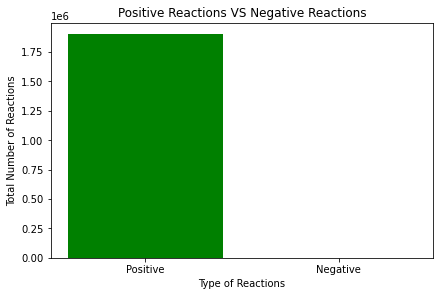

In [25]:
fig = plt.figure(constrained_layout=True)
ax_array = fig.subplots(1, 1, squeeze=False)

ax_array[0, 0].bar(['Positive', 'Negative'], [1901950, 2516], color=['green', 'red'])
plt.xlabel("Type of Reactions")
plt.ylabel("Total Number of Reactions")
plt.title("Positive Reactions VS Negative Reactions")

### Conclusion

* Between all positive reactions, likes has the highest reactions(1,516,054), followed by shares(282,159), loves(89,737), wows(9,090) and hahas(4,910) reactions. 
* Between all negative reactions, sads has the highest reactions(1,718), followed by angrys(798).
* There are much more positive reactions than negative reactions for Facebook live engagement. The analysis shows the total of positive reactions is at 1,901,950 while the total of negative reactions is at 2,516.


___________

## Part 2

### chatGPT

**Question1:** 
do users leave more positive reactions on Facebook live?

**Answer from chatGPT:**
It is possible that users leave more positive reactions on Facebook Live streams than negative ones. Facebook Live streams typically offer users the opportunity to engage with a video in real-time, which can make the experience more engaging and interactive. When users feel that they are part of a live event, they may be more likely to leave positive reactions and engage in a positive manner.

In addition, Facebook provides users with a range of positive reaction options, such as "Like," "Love," "Haha," "Wow," "Sad," and "Angry," which can enable users to express a range of emotions beyond simply "liking" a video. This can encourage users to leave more positive reactions that better reflect their feelings towards the content.

That said, the distribution of reactions can still depend on various factors, such as the content of the stream, the audience, and the purpose of the stream, as I mentioned in my previous response. So, it is difficult to make a blanket statement about whether users leave more positive or negative reactions on Facebook Live streams.

**Question2:** do Thai users leave more positive reactions on seller's Facebook live streams?

**Answer from chatGPT:** It is possible that Thai users may leave more positive reactions on seller's Facebook Live streams than users from other cultures, but as an AI language model, I don't have real-time access to data on the reactions of Thai users on Facebook Live streams.

That being said, Thai culture places a strong emphasis on social harmony and avoiding conflict, which may translate to more positive and polite interactions on social media platforms. Thai users may be more likely to leave positive reactions on seller's Facebook Live streams as a way to show support for the seller, even if they are not interested in purchasing the product. Additionally, in Thai culture, it is considered impolite to be too direct, and this may lead to more positive and indirect interactions on social media.

However, it's important to note that cultural differences are complex and cannot be generalized. The reactions of Thai users on seller's Facebook Live streams can also depend on various factors, including the product being sold, the seller's approach, and the audience. So, it's difficult to make a blanket statement about whether Thai users leave more positive reactions on seller's Facebook Live streams compared to users from other cultures.

### Userful information suggested by chatGPT

As chatGPT mentioned it is possible that users leave more positive reactions on Facebook Live streams than negative ones because Facebook Live Steams make users feel that they are part of a live event, they may be more likely to leave positive reactions and engage in a positive manner. This answer is parallel with my result from the data set used for this analysis. However, there are multiple factores that need to be taken into consideration for future analysis, for example, type of products, seller's approach, audience, promotion, etc. Culture is a complex factor and cannot be generalized, therefore, it cannot be used for analysis.